## 동전던지기 검증

Text(0, 0.5, '확률')

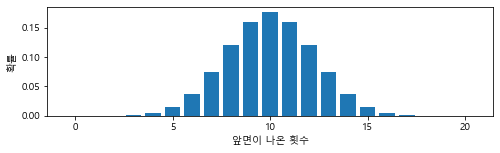

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
plt.rc('font', family='Malgun Gothic')


x = np.arange(0, 21)
y = scipy.stats.binom.pmf(x, 20, 0.5)
plt.figure(figsize=(8, 2))
plt.bar(x, y)
plt.xlabel('앞면이 나온 횟수')
plt.ylabel('확률')

In [2]:
import pandas as pd
p_value = pd.DataFrame({'앞면횟수' : x, '확률' : y}).query('앞면횟수 >= 15')['확률'].sum()
print(p_value)

0.02069473266601554


## 두 그룹의 모비율의 차를 이용한 검정

### 광고 매체별 신규 이용자 획득 검정

In [3]:
# 테스트 데이터. [지속 이용 전환 수, 이탈 수]
a = [40, 165]
b = [62, 228]
print('표본 A: 크기={}, 전환 수={}, 평균={:.3f}'.format(sum(a), a[0], a[0]/sum(a)))
print('표본 B: 크기={}, 전환 수={}, 평균={:.3f}'.format(sum(b), b[0], b[0]/sum(b)))

표본 A: 크기=205, 전환 수=40, 평균=0.195
표본 B: 크기=290, 전환 수=62, 평균=0.214


In [4]:
x = np.linspace(0, 1, 200)

Text(0, 0.5, '가능성')

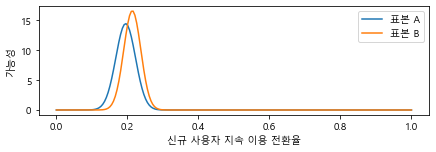

In [5]:
# 표본 A로부터 유입
n = sum(a)
p = a[0] / n
std = np.sqrt(p*(1-p) / n)
y_a = scipy.stats.norm.pdf(x, p, std)

# 표본 B로부터 유입
n = sum(b)
p = b[0] / n 
std = np.sqrt(p*(1-p)/n)
y_b = scipy.stats.norm.pdf(x, p, std)

plt.figure(figsize=(7, 2))
plt.plot(x, y_a, label='표본 A')
plt.plot(x, y_b, label='표본 B')
plt.legend(loc='best')
plt.xlabel('신규 사용자 지속 이용 전환율')
plt.ylabel('가능성')

In [6]:
# 카이제곱 검정
_, p_value, _ , _ = scipy.stats.chi2_contingency([a, b])
print(p_value)

0.694254736449269


## 가설검정에서 주의할 점
- 검정 대상 표본을 고정해야 함 
- 유의한 차이가 나오지 않는다고 표본을 바꿔가며 다시 시험하면 유의수준 자체가 무의미해짐

### 귀무가설이 참일 때 동전을 한 번 던질 때마다 검증을 다시해보는 예제

Text(0, 0.5, 'p-값')

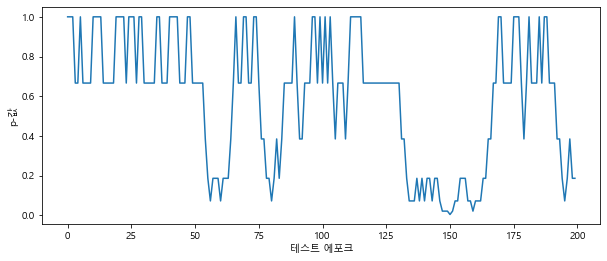

In [7]:
mu = 0.5 # 앞면이 나올 확률 50%
init_sample = list(scipy.stats.bernoulli.rvs(mu, size=20))

sample = init_sample
p_value_history = []
for i in range(200):
    # 최근 20회 시행의 결과를 사용하여 검정
    _, p_value = scipy.stats.ttest_1samp(sample[-20:], 0.5)
    p_value_history.append(p_value)
    
    # 동전을 다시 던진 다음 결과 저장
    sample.append(scipy.stats.bernoulli.rvs(mu))
    
plt.figure(figsize=(10, 4))
plt.plot(p_value_history)
plt.xlabel('테스트 에포크')
plt.ylabel('p-값')

### 6.3.2 유의한 차이와 비즈니스 임팩트

Text(0, 0.5, 'p-값')

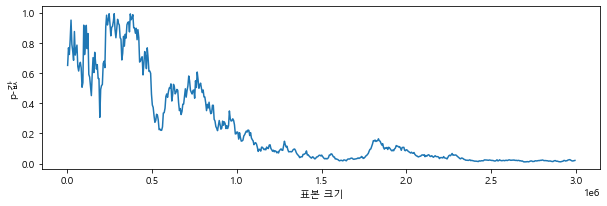

In [11]:
max_sample = 3000000
# 표본 A의 평균 : 45.1%
a = scipy.stats.bernoulli.rvs(0.451, size=max_sample)
# 표본 B의 평균 : 45.2%
b = scipy.stats.bernoulli.rvs(0.452, size=max_sample)
p_values = []
# 표본 크기를 5,000씩 늘려가며 검정 수행
sample_sizes = np.arange(1000, max_sample, 5000)
for sample_size in sample_sizes:
    _, p_value = scipy.stats.ttest_ind(a[:sample_size], b[:sample_size], equal_var=False)
    p_values.append(p_value)

plt.figure(figsize=(10, 3))
plt.plot(sample_sizes, p_values)
plt.xlabel('표본 크기')
plt.ylabel('p-값')

#### 주의
- 위의 그림을 보면 표본 크기 170만 정도를 넘으면 p-값이 0에 가까워지며 유의한 차이가 나타남. 
- 추정값의 들쭉날쭉한 정도를 나타내는 표준편차가 표본 크기가 커짐에 따라 작아지기 때문에 발생
- 표본 수백만 개는 웹 서비스 운영시 그리 큰 숫자도 아님
- 중요한 것은 유의한 차이가 있다는 것과 비즈니스에 영향을 미치는 영향은 별개라는 점
- 0.1%의 차이가 큰 의미가 있는지는 서비스 규모나 사업 내용에 따라 달라짐.
- 새로 출시한 기능을 유지할지에 대한 판단 역시 유의한 차이 유무에만 의존하지 말고 효과 검증도 해봐야함

#### 모평균의 차이를 보고 싶은 경우
- 신뢰 구간을 시각적으로 살펴보기

Text(0, 0.5, '모평균')

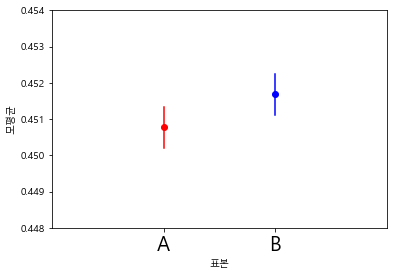

In [12]:
from statsmodels.stats.proportion import proportion_confint

# Wilson score interval을 이용하여 95% 신뢰구간을 구하기
a_lower, a_upper = proportion_confint(sum(a), len(a), alpha=0.05, method='wilson')
b_lower, b_upper = proportion_confint(sum(b), len(b), alpha=0.05, method='wilson')

plt.plot(1, np.mean(a), 'ro')
plt.plot(2, np.mean(b), 'bo')
plt.plot([1, 1], [a_lower, a_upper], 'r-')
plt.plot([2, 2], [b_lower, b_upper], 'b-')
plt.ylim(0.448, 0.454)
plt.xlim(0, 3)
plt.xticks([1, 2], ['A', 'B'], fontsize=20)
plt.xlabel('표본')
plt.ylabel('모평균')